## Model-1 MLP-Cardio

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load the dataset
data = pd.read_csv('cardio.csv')

data.info()

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

#print(type(x))
#print(type(y))
#print(x.shape)
#print(y.shape)

# create train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
feature_test = x_test[['age', 'gender', 'height', 'weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']]
print('Loading is done.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68426 entries, 0 to 68425
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68426 non-null  int64  
 1   gender       68426 non-null  int64  
 2   height       68426 non-null  int64  
 3   weight       68426 non-null  float64
 4   ap_hi        68426 non-null  int64  
 5   ap_lo        68426 non-null  int64  
 6   cholesterol  68426 non-null  int64  
 7   gluc         68426 non-null  int64  
 8   smoke        68426 non-null  int64  
 9   alco         68426 non-null  int64  
 10  active       68426 non-null  int64  
 11  cardio       68426 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.3 MB
Loading is done.


In [2]:
import seaborn as sns
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)

#create a heat map
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    plt.ylabel('Reference',fontsize=12)
    plt.xlabel('Precision',fontsize=12)
    plt.show()

In [3]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

# initialize model
clf_MLP = MLPClassifier(hidden_layer_sizes=(20,20), activation='relu', max_iter=1000, learning_rate='constant', learning_rate_init=0.001)
# training & testing
%time clf_MLP.fit(x_train,y_train)
print(clf_MLP.score(x_train, y_train))
print(clf_MLP.score(x_test, y_test))

CPU times: total: 9.19 s
Wall time: 9.18 s
0.722932063969268
0.7251558846453624


confusion matrics:
 [[8191 2213]
 [3429 6695]]


classification report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74     10404
           1       0.75      0.66      0.70     10124

    accuracy                           0.73     20528
   macro avg       0.73      0.72      0.72     20528
weighted avg       0.73      0.73      0.72     20528



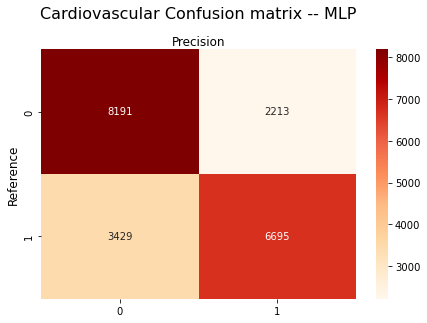

E:\Anaconda\main\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


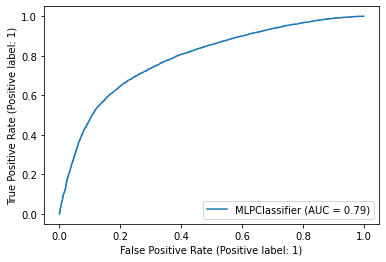

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf_MLP.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrics:\n", cnf_matrix)
print("\n\nclassification report:\n",classification_report(y_test,y_pred))
plot_cnf_matirx(cnf_matrix,'Cardiovascular Confusion matrix -- MLP')
metrics.plot_roc_curve(clf_MLP,feature_test,y_test)

## Model-1 MLP-Stroke

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load the dataset
data = pd.read_excel('stroke-bal.xlsx')

data.info()

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

#print(type(x))
#print(type(y))
#print(x.shape)
#print(y.shape)

# create train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
feature_test = x_test[['age', 'gender','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']]
print('Loading is done.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             499 non-null    int64  
 1   age                499 non-null    float64
 2   hypertension       499 non-null    int64  
 3   heart_disease      499 non-null    int64  
 4   ever_married       499 non-null    int64  
 5   work_type          499 non-null    int64  
 6   Residence_type     499 non-null    int64  
 7   avg_glucose_level  499 non-null    float64
 8   bmi                499 non-null    float64
 9   smoking_status     499 non-null    int64  
 10  stroke             499 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 43.0 KB
Loading is done.


In [7]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

# initialize model
clf_MLP = MLPClassifier(hidden_layer_sizes=(20,20), activation='relu', max_iter=1000, learning_rate='constant', learning_rate_init=0.001, early_stopping=False)

# training & testing
%time clf_MLP.fit(x_train,y_train)
print(clf_MLP.score(x_train, y_train))
print(clf_MLP.score(x_test, y_test))

CPU times: total: 328 ms
Wall time: 330 ms
0.7765042979942693
0.6866666666666666


confusion matrics:
 [[42 30]
 [17 61]]


classification report:
               precision    recall  f1-score   support

           0       0.71      0.58      0.64        72
           1       0.67      0.78      0.72        78

    accuracy                           0.69       150
   macro avg       0.69      0.68      0.68       150
weighted avg       0.69      0.69      0.68       150



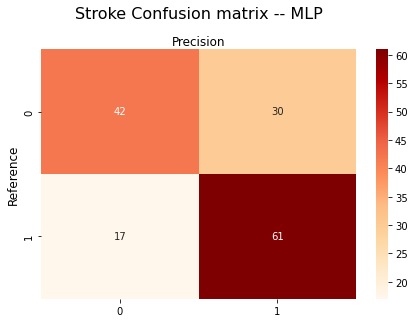

E:\Anaconda\main\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
E:\Anaconda\main\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


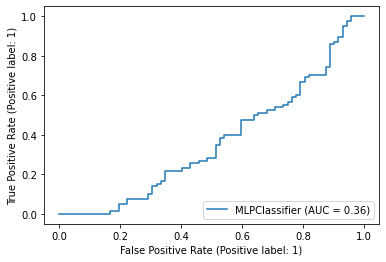

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf_MLP.predict(x_test)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrics:\n", cnf_matrix)
print("\n\nclassification report:\n",classification_report(y_test,y_pred))
plot_cnf_matirx(cnf_matrix,'Stroke Confusion matrix -- MLP')
metrics.plot_roc_curve(clf_MLP,feature_test,y_test)

## Model-2 CNN-Cardio

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

# Load the data into a DataFrame
df = pd.read_csv('cardio.csv')

# Define a custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, data):
        self.X = data.iloc[:, :-1].values
        self.y = data.iloc[:, -1].values
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

# Split the data into train and test sets
train_df = df.sample(frac=0.7, random_state=42)
test_df = df.drop(train_df.index)

# Load the data into DataLoader objects
train_dataset = CustomDataset(train_df)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = CustomDataset(test_df)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=32*2, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=1)
        
    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.tanh(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = nn.functional.tanh(x)
        x = self.pool2(x)
        x = x.view(-1, 32*2)
        x = self.fc1(x)
        x = nn.functional.tanh(x)
        x = self.fc2(x)
        return x

In [11]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Define the number of epochs
n_epochs = 20

for epoch in range(n_epochs):
    running_loss = 0.0
    
    # Iterate over the training data
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward + backward + optimize
        outputs = model(inputs.unsqueeze(1))
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        
        """# Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0"""

print("Training is done.")

Training is done.


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Set the threshold for binary classification
threshold = 0.5

# Initialize variables
test_loss = 0.0
correct = 0
total = 0
y_true = []
y_scores = []

# Evaluate the model on the test set
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs.unsqueeze(1))
        predicted = (outputs > threshold).float()
        total += labels.size(0)
        correct += (predicted == labels.unsqueeze(1)).sum().item()
        test_loss += criterion(outputs, labels.unsqueeze(1)).item()
        y_true += labels.tolist()
        y_scores += predicted.tolist()
        y_pred = y_scores

accuracy = 100 * correct / total
print('Test Loss: {:.2f}%'.format(100 * test_loss / len(test_loader)))
print('Accuracy: {:.2f}%'.format(accuracy))

Test Loss: 18.74%
Accuracy: 72.15%


Confusion Matrix:
 [[7983 2337]
 [3381 6827]]


classification report:
               precision    recall  f1-score   support

         0.0       0.70      0.77      0.74     10320
         1.0       0.74      0.67      0.70     10208

    accuracy                           0.72     20528
   macro avg       0.72      0.72      0.72     20528
weighted avg       0.72      0.72      0.72     20528



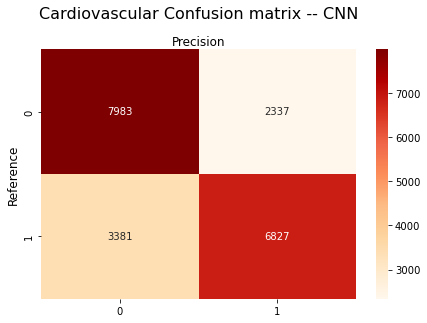

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

# Compute the confusion matrix
y_true = np.array(y_true)
y_pred = np.array(y_pred)
cnf_matrix = confusion_matrix(y_true, y_pred)

print('Confusion Matrix:\n', cnf_matrix)

# Compute the classification report
y_true = np.array(y_true)
y_pred = np.array(y_pred)
print("\n\nclassification report:\n",classification_report(y_true,y_pred))
plot_cnf_matirx(cnf_matrix,'Cardiovascular Confusion matrix -- CNN')

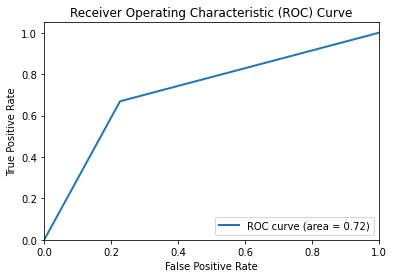

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Convert true labels and predicted scores to NumPy arrays
y_true = np.array(y_true)
y_scores = np.array(y_scores)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores, drop_intermediate=False)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Model-2 CNN-Stroke

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

# Load the data into a DataFrame
df = pd.read_excel('stroke-bal.xlsx')

# Define a custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, data):
        self.X = data.iloc[:, :-1].values
        self.y = data.iloc[:, -1].values
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

# Split the data into train and test sets
train_df = df.sample(frac=0.7, random_state=42)
test_df = df.drop(train_df.index)

# Load the data into DataLoader objects
train_dataset = CustomDataset(train_df)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = CustomDataset(test_df)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=32*2, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=1)
        
    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.tanh(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = nn.functional.tanh(x)
        x = self.pool2(x)
        x = x.view(-1, 32*2)
        x = self.fc1(x)
        x = nn.functional.tanh(x)
        x = self.fc2(x)
        return x

In [17]:
model = CNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
# Define the number of epochs
n_epochs = 20

for epoch in range(n_epochs):
    running_loss = 0.0
    
    # Iterate over the training data
    for i, data in enumerate(train_loader, 0):
        # Get the inputs and labels
        inputs, labels = data
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward + backward + optimize
        outputs = model(inputs.unsqueeze(1))
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()
        
        """# Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0"""

print("Training is done.")

Training is done.


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Set the threshold for binary classification
threshold = 0.5

# Initialize variables
test_loss = 0.0
correct = 0
total = 0
y_true = []
y_scores = []

# Evaluate the model on the test set
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs.unsqueeze(1))
        predicted = (outputs > threshold).float()
        total += labels.size(0)
        correct += (predicted == labels.unsqueeze(1)).sum().item()
        test_loss += criterion(outputs, labels.unsqueeze(1)).item()
        y_true += labels.tolist()
        y_scores += predicted.tolist()
        y_pred = y_scores


accuracy = 100 * correct / total
print('Test Loss: {:.2f}%'.format(100 * test_loss / len(test_loader)))
print('Accuracy: {:.2f}%'.format(accuracy))

Test Loss: 17.07%
Accuracy: 73.33%


Confusion Matrix:
 [[46 33]
 [ 7 64]]


classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.58      0.70        79
         1.0       0.66      0.90      0.76        71

    accuracy                           0.73       150
   macro avg       0.76      0.74      0.73       150
weighted avg       0.77      0.73      0.73       150



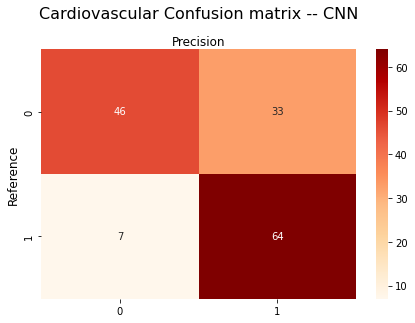

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report

# Compute the confusion matrix
y_true = np.array(y_true)
y_pred = np.array(y_pred)
cnf_matrix = confusion_matrix(y_true, y_pred)

print('Confusion Matrix:\n', cnf_matrix)

# Compute the classification report
y_true = np.array(y_true)
y_pred = np.array(y_pred)
print("\n\nclassification report:\n",classification_report(y_true,y_pred))
plot_cnf_matirx(cnf_matrix,'Cardiovascular Confusion matrix -- CNN')

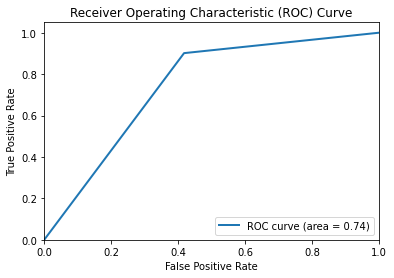

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Convert true labels and predicted scores to NumPy arrays
y_true = np.array(y_true)
y_scores = np.array(y_scores)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores, drop_intermediate=False)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()